# Absorption
Absorption is a key principle of pharmacokinetics, which is the study of how the body interacts with a drug over time, including the processes of absorption, distribution, metabolism, and excretion (ADME).

In the context of drug therapy, absorption refers to the process through which a drug moves from the site of administration into the bloodstream. The rate and extent of absorption can significantly impact how quickly and effectively a drug acts.

Various factors can influence drug absorption, including:

**1. Route of Administration**: The route of administration significantly impacts how a drug is absorbed. For instance, drugs administered intravenously bypass the absorption process as they are introduced directly into the bloodstream. However, orally administered drugs must pass through the stomach and intestines, where they are absorbed into the bloodstream. This can be influenced by factors such as pH levels, presence of food, and gastrointestinal motility.

**2. Drug Formulation**: The physical and chemical properties of the drug can influence how well it is absorbed. For example, drugs formulated in a liquid solution are often absorbed more rapidly than those in a tablet or capsule.

**3. Physiological Factors**: Individual characteristics like age, sex, genetic factors, and health status can also influence drug absorption. For example, certain conditions like malabsorption syndromes or diseases affecting the liver or kidney can alter the absorption of drugs.

**4. Drug Interactions**: Certain drugs can interact in the body and affect absorption. For instance, some medications can increase stomach acidity, which can affect the absorption of other drugs.

Understanding absorption is crucial in drug therapy as it affects the onset, intensity, and duration of a drug's effect. A drug must be absorbed into the bloodstream before it can reach its site of action, and variations in the rate and extent of absorption can lead to differences in how individuals respond to the same dose of a drug. Consequently, understanding absorption can help in designing drug dosing regimens and predicting a drug's effect.


# Simple absorption models

In the following we study a simple model for absorption and elimination. A can be absorbed from the tablet in the systemic circulation ($A_{tablet} \rightarrow A_{system}$) which can be eliminated in the urine via renal excretion ($A_{system} \rightarrow A_{urine}$).

![Absorption Elimination Model](04_simple_absorption.png)

Elimination and absorption are assumed to be Mass-Action, i.e., depending on a rate constant k and the amount or concentration of the respective substance.

The ordinary differential equation system (ODE) results in: 

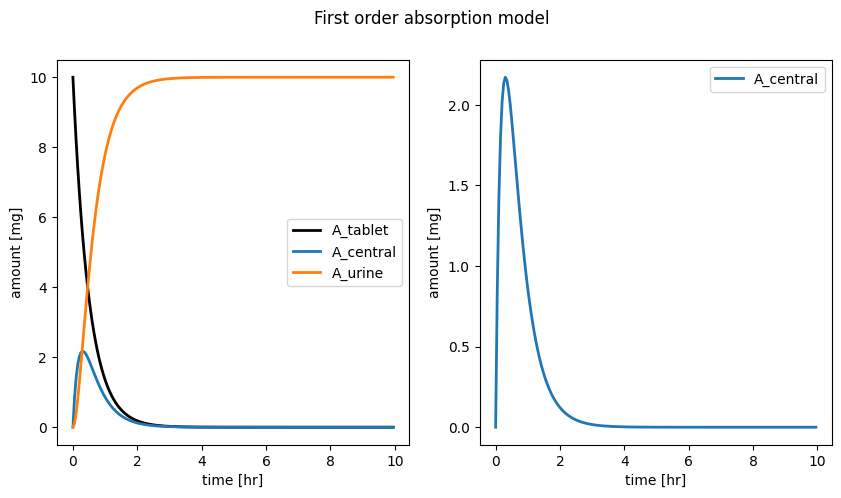

In [1]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pylab as plt

def dxdt_absorption_first_order(x, t, ka, ke):
    """
    First order absorption model
    """
    # state variables
    A_tablet = x[0]  # [mg]
    A_central = x[1] # [mg/l]
    A_urine = x[2] # [mg]
    
    # rates
    va = ka * A_tablet  # [mg/hr]
    ve = ke * A_central # [mg/hr]

    # odes (stoichiometric equation)    
    return [
        -va,            # dA_tablet/dt  [mg/hr]
         va - ve,       # dA_central/dt [mg/hr]
         ve,            # dA_urine/dt  [mg/hr]
    ] 


# initial condition and time span
t = np.arange(0, 10, 0.05) # [hr]
Dose_A = 10.0  # [mg]
x0 = [
    Dose_A,  # A_tablet  [mg]
    0,   # A_central [mg]
    0,   # A_urine [mg]
]

# parameters
ka = 2.0  # [1/hr]
ke = 5.0  # [1/hr]

x = odeint(dxdt_absorption_first_order, x0, t, args=(ka, ke))
names = ["A_tablet", "A_central", "A_urine"]
colors = ["black", "tab:blue", "tab:orange"]

# plot results
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
f.suptitle("First order absorption model")
# all species
for k, name in enumerate(names):
    ax1.plot(t, x[:, k], linewidth=2, label=name, color=colors[k])

# only A_central
ax2.plot(t, x[:, 1], linewidth=2, label=names[1], color=colors[1])

for ax in (ax1, ax2):

    ax.legend()
    ax.set_xlabel("time [hr]")
    ax.set_ylabel("amount [mg]")

plt.show()

When `va = ve` the peak concentration in the central compartment is reached.

## Effect of absorption parameter

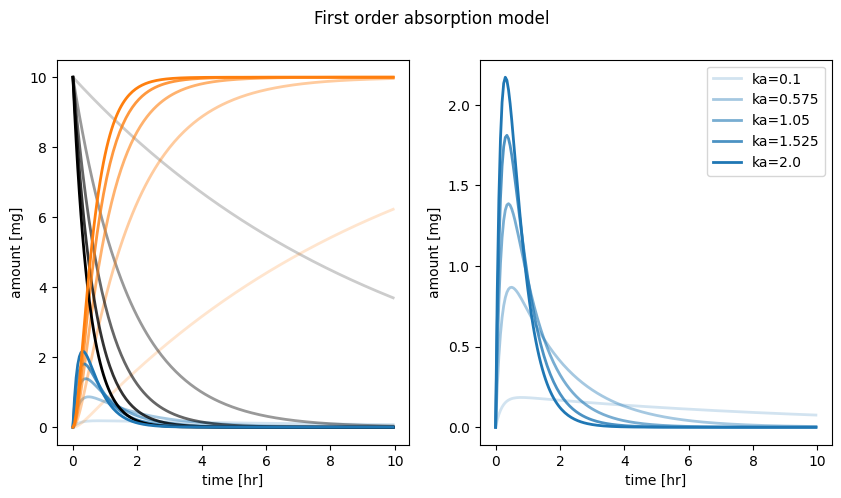

In [2]:
# parameters
ka = 2.0  # [1/hr]
ke = 5.0  # [1/hr]

n_samples = 5
kas = np.linspace(0.1, 2.0, num=n_samples)  # [1/hr]

# plot results
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
f.suptitle("First order absorption model")

for kp, ka in enumerate(kas):
    x = odeint(dxdt_absorption_first_order, x0, t, args=(ka, ke))
    
    # all species
    for k, name in enumerate(names):
        ax1.plot(t, x[:, k], linewidth=2, color=colors[k], alpha=(kp+1)/n_samples, label=f"{ka=}")

    # only A_central
    ax2.plot(t, x[:, 1], linewidth=2, color=colors[1], alpha=(kp+1)/n_samples, label=f"{ka=}")

    for ax in (ax1, ax2):
        ax.set_xlabel("time [hr]")
        ax.set_ylabel("amount [mg]")
    ax2.legend()

plt.show()

# Lag absorption models
Absorption can show a time lag due stomach passage or absorption in later regions of the intestine (e.g. ileum, jejunum). Such lags can be introduced either directly in absorption equations or via so called transit chains (i.e. chains of absorption reactions).

![Intestine sections](04_intestine_parts.png)

First we have a look at models with an explicit delay in form of a lag time.

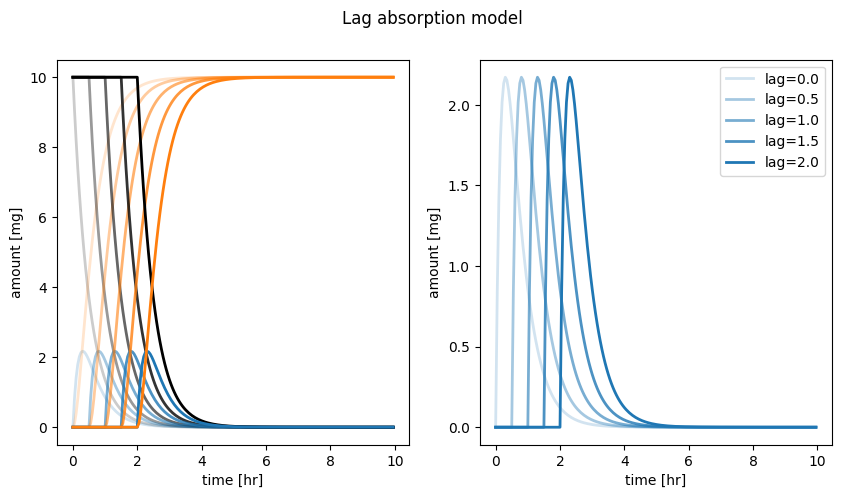

In [3]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pylab as plt

def dxdt_absorption_lag(x, t, ka, ke, lag=0.0):
    """
    First order absorption model with lag time
    """
    # state variables
    A_tablet = x[0]  # [mg]
    A_central = x[1] # [mg/l]
    A_urine = x[2] # [mg]
    
    # rates
    if t >= lag:
        va = ka * A_tablet  # [mg/hr]
    else:
        va = 0
    ve = ke * A_central # [mg/hr]

    # odes (stoichiometric equation)    
    return [
        -va,            # dA_tablet/dt  [mg/hr]
         va - ve,       # dA_central/dt [mg/hr]
         ve,            # dA_urine/dt  [mg/hr]
    ] 

ka = 2.0  # [1/hr]
ke = 5.0  # [1/hr]

n_samples = 5
lags = np.linspace(0.0, 2.0, num=n_samples)  # [hr]

# plot results
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
f.suptitle("Lag absorption model")

for kp, lag in enumerate(lags):
    x = odeint(dxdt_absorption_lag, x0, t, args=(ka, ke, lag))
    
    # all species
    for k, name in enumerate(names):
        ax1.plot(t, x[:, k], linewidth=2, color=colors[k], alpha=(kp+1)/n_samples, label=f"{lag=}")

    # only A_central
    ax2.plot(t, x[:, 1], linewidth=2, color=colors[1], alpha=(kp+1)/n_samples, label=f"{lag=}")

    for ax in (ax1, ax2):

        ax.set_xlabel("time [hr]")
        ax.set_ylabel("amount [mg]")
    ax2.legend()

plt.show()

# Transit chain absorption models
Now we have a look at the example of a transit chain. By coupling a set of reactions delays can be introduced and curves are smoothend.

![Transit chain](04_transit_chain.png)

Due to the transit chain the substance appears delayed in the systemic circulation (central compartment).

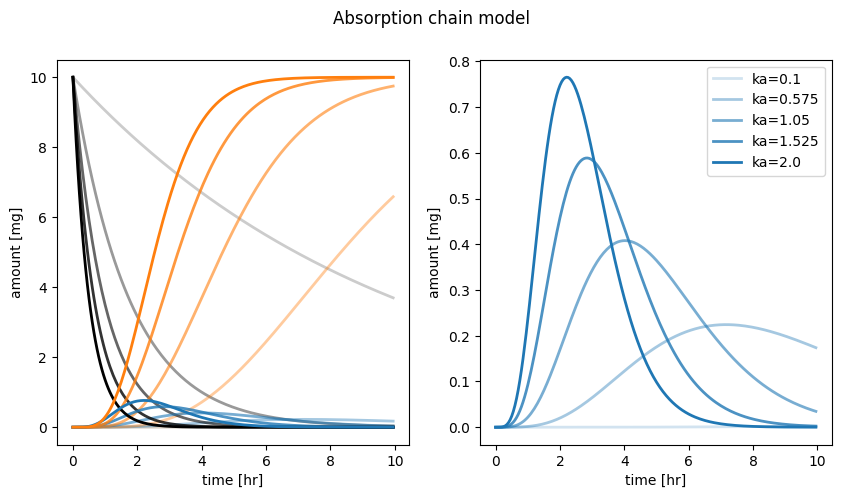

In [4]:
def dxdt_absorption_chain(x, t, ka, ke):
    """
    First order absorption model for transit chain.
    """
    # state variables
    A_tablet = x[0]  # [mg]
    A_central = x[1] # [mg/l]
    A_urine = x[2] # [mg]
    A1 = x[3]
    A2 = x[4]
    A3 = x[5]
    A4 = x[6]
    
    # rates
    va = ka * A_tablet  # [mg/hr]
    ve = ke * A_central # [mg/hr]
    v1 = ka * x[3]
    v2 = ka * x[4]
    v3 = ka * x[5]
    v4 = ka * x[6]

    # odes (stoichiometric equation)
    dxdt = np.zeros(7)
    
    dxdt[0] = -va            # dA_tablet/dt  [mg/hr]
    dxdt[1] =  v4 - ve     # dA_central/dt [mg/hr] (end of chain)
    dxdt[2] =  ve            # dA_urine/dt  [mg/hr]
    dxdt[3] = va - v1
    dxdt[4] = v1 - v2
    dxdt[5] = v2 - v3
    dxdt[6] = v3 - v4
        
    return dxdt

# initial condition and time span
t = np.arange(0, 10, 0.05) # [hr]
Dose_A = 10.0  # [mg]
x0 = [
    Dose_A,  # A_tablet  [mg]
    0.0,   # A_central [mg]
    0.0,   # A_urine [mg]
    0.0,   # A1 [mg]
    0.0,   # A2 [mg]
    0.0,   # A3 [mg]
    0.0,   # A4 [mg]
]

names = ["A_tablet", "A_central", "A_urine"]
colors = ["black", "tab:blue", "tab:orange"]

# parameters
ka = 2.0  # [1/hr]
ke = 5.0  # [1/hr]

n_samples = 5
kas = np.linspace(0.1, 2.0, num=n_samples)  # [1/hr]

# plot results
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
f.suptitle("Absorption chain model")

for kp, ka in enumerate(kas):
    x = odeint(dxdt_absorption_chain, x0, t, args=(ka, ke))
    
    # all species
    for k, name in enumerate(names):
        ax1.plot(t, x[:, k], linewidth=2, color=colors[k], alpha=(kp+1)/n_samples, label=f"{ka=}")

    # only A_central
    ax2.plot(t, x[:, 1], linewidth=2, color=colors[1], alpha=(kp+1)/n_samples, label=f"{ka=}")

    for ax in (ax1, ax2):
        ax.set_xlabel("time [hr]")
        ax.set_ylabel("amount [mg]")
    ax2.legend()

plt.show()